<h1><center>🐁Mice Trisomy Data Analysis🔎</center></h1>
<h3><center>🧬(Prediction at the end)🔮</center></h3>
<center><img src= "https://www.jax.org/~/media/JaxWeb/images/jax-mice-and-services/mice/datasheets/001924" alt ="Titanic" style='width: 600px;'></center>

<h3>Context</h3>
<p>

Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome mice exposed to context fear conditioning, a task used to assess associative learning.

</p>

<h3>Content</h3>
<p>

The data set consists of the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of cortex. There are 38 control mice and 34 trisomic mice (Down syndrome), for a total of 72 mice. In the experiments, 15 measurements were registered of each protein per sample/mouse. Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 510 measurements. The dataset contains a total of 1080 measurements per protein. Each measurement can be considered as an independent sample/mouse.

The eight classes of mice are described based on features such as genotype, behavior and treatment. According to genotype, mice can be control or trisomic. According to behavior, some mice have been stimulated to learn (context-shock) and others have not (shock-context) and in order to assess the effect of the drug memantine in recovering the ability to learn in trisomic mice, some mice have been injected with the drug and others have not.
</p>



# Exploratory Data Analysis

## Aim :
- Understand the data ("A small step forward is better than a big one backwards")
- Begin to develop a modelling strategy

## Target
Classes:

c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)
    
c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)
    
c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)
    
c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)
    
t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)
    
t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)
    
t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)
    
t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)

## Features

[1] Mouse ID

[2:78] Values of expression levels of 77 proteins; the names of proteins are followed by N indicating that they were measured in the nuclear fraction. For example: DYRK1A_n

[79] Genotype: control (c) or trisomy (t)

[80] Treatment type: memantine (m) or saline (s)

[81] Behavior: context-shock (CS) or shock-context (SC)

[82] Class: c-CS-s, c-CS-m, c-SC-s, c-SC-m, t-CS-s, t-CS-m, t-SC-s, t-SC-m

## Base Checklist
#### Shape Analysis :
- **target feature** : Class
- **rows and columns** : 1080 , 82
- **features types** : qualitatives : 5 , quantitatives : 77
- **NaN analysis** :
    - NaN (5 features > 15 % of NaN (all others < 5%))

#### Columns Analysis :
- **Target Analysis** :
    - Balanced (Yes/No) : Yes
    - Percentages : ~12.5% for each class
- **Categorical values**
    - There is 4 categorical features (not inluding the target)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../input/mice-protein-expression/Data_Cortex_Nuclear.csv')
df = data.copy()
pd.set_option('display.max_row',df.shape[0])
pd.set_option('display.max_column',df.shape[1]) 
df.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N  \
0  0.177565   2.373744  0.232224  1.750936  0.687906  0.306382  0.402698   
1  0.172817   2.292150  0.226972  1.596377  0.695006  0.299051  0.385987   
2  0.175722   2.283337  0.230247  1.561316  0.677348  0.291276  0.381002   
3  0.176463   2.152301  0.207004  1.595086  0.583277  0.296729  0.377087   
4  0.173627   2.134014  0.192158  1.504230  0.550960  0.286961  0.363502   

     pMEK_N    pNR1_N   pNR2A_N   pNR2B_N  pPKCAB_N    pRSK_N     AKT_N  \
0  0.296927  1.022060  0.605673  1.877684  2.308745  0.441599  0.859366   
1  0.281319  0.956676  0.587559  1.725774  2.043037  0.445222  0.834659   
2  0.281710  1.003635  0.602449  1.731873  2.017984  0.467668  0.814329   
3  0.313832  0.875390  0.520293  1.566852  2.132754  0.477671  0.727705   
4  0.277964  0.864912  0.507990  1.480059  2.013697  0.483416  0.687794   

     BRAF_N  CAMKII_N    CREB_N     ELK_N     ERK_N   GSK3B_N     JNK_N  \
0  0.416289  0.369608  0.178944  1.866358  3.685247  1.537227  0.264526   
1  0.400364  0.356178  0.173680  1.761047  3.485287  1.509249  0.255727   
2  0.399847  0.368089  0.173905  1.765544  3.571456  1.501244  0.259614   
3  0.385639  0.362970  0.179449  1.286277  2.970137  1.419710  0.259536   
4  0.367531  0.355311  0.174836  1.324695  2.896334  1.359876  0.250705   

      MEK_N    TRKA_N     RSK_N     APP_N  Bcatenin_N    SOD1_N    MTOR_N  \
0  0.319677  0.813866  0.165846  0.453910    3.037621  0.369510  0.458539   
1  0.304419  0.780504  0.157194  0.430940    2.921882  0.342279  0.423560   
2  0.311747  0.785154  0.160895  0.423187    2.944136  0.343696  0.425005   
3  0.279218  0.734492  0.162210  0.410615    2.500204  0.344509  0.429211   
4  0.273667  0.702699  0.154827  0.398550    2.456560  0.329126  0.408755   

      P38_N   pMTOR_N   DSCR1_N   AMPKA_N    NR2B_N   pNUMB_N  RAPTOR_N  \
0  0.335336  0.825192  0.576916  0.448099  0.586271  0.394721  0.339571   
1  0.324835  0.761718  0.545097  0.420876  0.545097  0.368255  0.321959   
2  0.324852  0.757031  0.543620  0.404630  0.552994  0.363880  0.313086   
3  0.330121  0.746980  0.546763  0.386860  0.547849  0.366771  0.328492   
4  0.313415  0.691956  0.536860  0.360816  0.512824  0.351551  0.312206   

    TIAM1_N  pP70S6_N    NUMB_N   P70S6_N  pGSK3B_N   pPKCG_N    CDK5_N  \
0  0.482864  0.294170  0.182150  0.842725  0.192608  1.443091  0.294700   
1  0.454519  0.276431  0.182086  0.847615  0.194815  1.439460  0.294060   
2  0.447197  0.256648  0.184388  0.856166  0.200737  1.524364  0.301881   
3  0.442650  0.398534  0.161768  0.760234  0.184169  1.612382  0.296382   
4  0.419095  0.393447  0.160200  0.768113  0.185718  1.645807  0.296829   

       S6_N  ADARB1_N  AcetylH3K9_N    RRP1_N     BAX_N     ARC_N   ERBB4_N  \
0  0.354605  1.339070      0.170119  0.159102  0.188852  0.106305  0.144989   
1  0.354548  1.306323      0.171427  0.158129  0.184570  0.106592  0.150471   
2  0.386087  1.279600      0.185456  0.148696  0.190532  0.108303  0.145330   
3  0.290680  1.198765      0.159799  0.166112  0.185323  0.103184  0.140656   
4  0.309345  1.206995      0.164650  0.160687  0.188221  0.104784  0.141983   

     nNOS_N     Tau_N    GFAP_N   GluR3_N   GluR4_N    IL1B_N   P3525_N  \
0  0.176668  0.125190  0.115291  0.228043  0.142756  0.430957  0.247538   
1  0.178309  0.134275  0.118235  0.238073  0.142037  0.457156  0.257632   
2  0.176213  0.132560  0.117760  0.244817  0.142445  0.510472  0.255343   
3  0.163804  0.123210  0.117439  0.234947  0.145068  0.430996  0

In [3]:
df.dtypes.value_counts() # Compte les nombre de types de variables

float64    77
object      5
dtype: int64

In [4]:
print('There is' , df.shape[0] , 'rows')
print('There is' , df.shape[1] , 'columns')

There is 1080 rows
There is 82 columns


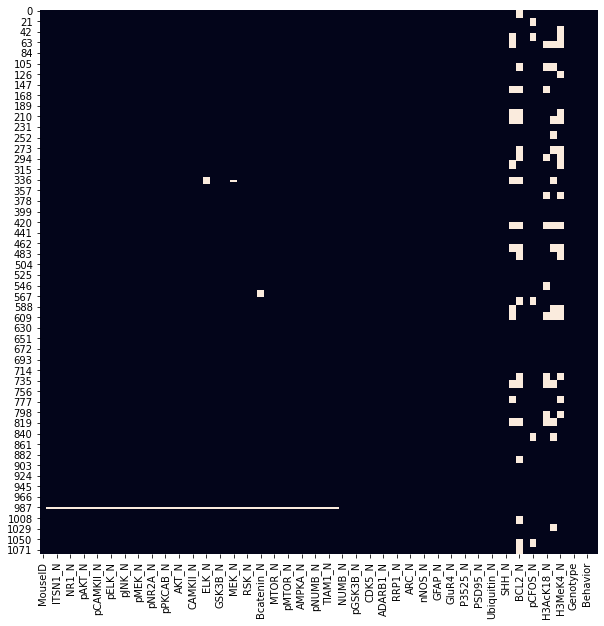

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isna(),cbar=False)
plt.show()

In [6]:
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

BCL2_N             26.388889
H3MeK4_N           25.000000
BAD_N              19.722222
EGR1_N             19.444444
H3AcK18_N          16.666667
pCFOS_N             6.944444
ELK_N               1.666667
Bcatenin_N          1.666667
MEK_N               0.648148
P38_N               0.277778
JNK_N               0.277778
TRKA_N              0.277778
RSK_N               0.277778
SOD1_N              0.277778
MTOR_N              0.277778
RAPTOR_N            0.277778
pMTOR_N             0.277778
DSCR1_N             0.277778
AMPKA_N             0.277778
GSK3B_N             0.277778
pNUMB_N             0.277778
DYRK1A_N            0.277778
TIAM1_N             0.277778
pP70S6_N            0.277778
NR2B_N              0.277778
APP_N               0.277778
ERK_N               0.277778
PKCA_N              0.277778
NR1_N               0.277778
NR2A_N              0.277778
pAKT_N              0.277778
pBRAF_N             0.277778
CREB_N              0.277778
pCAMKII_N           0.277778
pCREB_N       

In [7]:
exploitable = df.columns[df.isna().sum()/df.shape[0]< 0.70 ] #Colonnes du dataframe où le pourcentage de NaN inférieur à XXXXXXX %
df = df[exploitable]
df.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N  \
0  0.177565   2.373744  0.232224  1.750936  0.687906  0.306382  0.402698   
1  0.172817   2.292150  0.226972  1.596377  0.695006  0.299051  0.385987   
2  0.175722   2.283337  0.230247  1.561316  0.677348  0.291276  0.381002   
3  0.176463   2.152301  0.207004  1.595086  0.583277  0.296729  0.377087   
4  0.173627   2.134014  0.192158  1.504230  0.550960  0.286961  0.363502   

     pMEK_N    pNR1_N   pNR2A_N   pNR2B_N  pPKCAB_N    pRSK_N     AKT_N  \
0  0.296927  1.022060  0.605673  1.877684  2.308745  0.441599  0.859366   
1  0.281319  0.956676  0.587559  1.725774  2.043037  0.445222  0.834659   
2  0.281710  1.003635  0.602449  1.731873  2.017984  0.467668  0.814329   
3  0.313832  0.875390  0.520293  1.566852  2.132754  0.477671  0.727705   
4  0.277964  0.864912  0.507990  1.480059  2.013697  0.483416  0.687794   

     BRAF_N  CAMKII_N    CREB_N     ELK_N     ERK_N   GSK3B_N     JNK_N  \
0  0.416289  0.369608  0.178944  1.866358  3.685247  1.537227  0.264526   
1  0.400364  0.356178  0.173680  1.761047  3.485287  1.509249  0.255727   
2  0.399847  0.368089  0.173905  1.765544  3.571456  1.501244  0.259614   
3  0.385639  0.362970  0.179449  1.286277  2.970137  1.419710  0.259536   
4  0.367531  0.355311  0.174836  1.324695  2.896334  1.359876  0.250705   

      MEK_N    TRKA_N     RSK_N     APP_N  Bcatenin_N    SOD1_N    MTOR_N  \
0  0.319677  0.813866  0.165846  0.453910    3.037621  0.369510  0.458539   
1  0.304419  0.780504  0.157194  0.430940    2.921882  0.342279  0.423560   
2  0.311747  0.785154  0.160895  0.423187    2.944136  0.343696  0.425005   
3  0.279218  0.734492  0.162210  0.410615    2.500204  0.344509  0.429211   
4  0.273667  0.702699  0.154827  0.398550    2.456560  0.329126  0.408755   

      P38_N   pMTOR_N   DSCR1_N   AMPKA_N    NR2B_N   pNUMB_N  RAPTOR_N  \
0  0.335336  0.825192  0.576916  0.448099  0.586271  0.394721  0.339571   
1  0.324835  0.761718  0.545097  0.420876  0.545097  0.368255  0.321959   
2  0.324852  0.757031  0.543620  0.404630  0.552994  0.363880  0.313086   
3  0.330121  0.746980  0.546763  0.386860  0.547849  0.366771  0.328492   
4  0.313415  0.691956  0.536860  0.360816  0.512824  0.351551  0.312206   

    TIAM1_N  pP70S6_N    NUMB_N   P70S6_N  pGSK3B_N   pPKCG_N    CDK5_N  \
0  0.482864  0.294170  0.182150  0.842725  0.192608  1.443091  0.294700   
1  0.454519  0.276431  0.182086  0.847615  0.194815  1.439460  0.294060   
2  0.447197  0.256648  0.184388  0.856166  0.200737  1.524364  0.301881   
3  0.442650  0.398534  0.161768  0.760234  0.184169  1.612382  0.296382   
4  0.419095  0.393447  0.160200  0.768113  0.185718  1.645807  0.296829   

       S6_N  ADARB1_N  AcetylH3K9_N    RRP1_N     BAX_N     ARC_N   ERBB4_N  \
0  0.354605  1.339070      0.170119  0.159102  0.188852  0.106305  0.144989   
1  0.354548  1.306323      0.171427  0.158129  0.184570  0.106592  0.150471   
2  0.386087  1.279600      0.185456  0.148696  0.190532  0.108303  0.145330   
3  0.290680  1.198765      0.159799  0.166112  0.185323  0.103184  0.140656   
4  0.309345  1.206995      0.164650  0.160687  0.188221  0.104784  0.141983   

     nNOS_N     Tau_N    GFAP_N   GluR3_N   GluR4_N    IL1B_N   P3525_N  \
0  0.176668  0.125190  0.115291  0.228043  0.142756  0.430957  0.247538   
1  0.178309  0.134275  0.118235  0.238073  0.142037  0.457156  0.257632   
2  0.176213  0.132560  0.117760  0.244817  0.142445  0.510472  0.255343   
3  0.163804  0.123210  0.117439  0.234947  0.145068  0.430996  0

## Examining target and features

In [8]:
df['class'].value_counts(normalize=True) #Classes déséquilibrées

c-CS-m    0.138889
c-SC-m    0.138889
c-SC-s    0.125000
t-SC-s    0.125000
t-SC-m    0.125000
t-CS-m    0.125000
c-CS-s    0.125000
t-CS-s    0.097222
Name: class, dtype: float64

<Figure size 432x288 with 0 Axes>

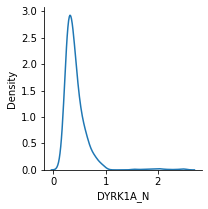

<Figure size 432x288 with 0 Axes>

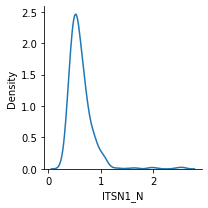

<Figure size 432x288 with 0 Axes>

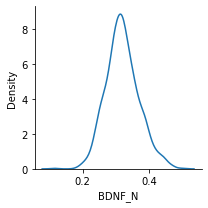

<Figure size 432x288 with 0 Axes>

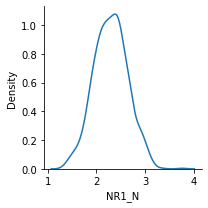

<Figure size 432x288 with 0 Axes>

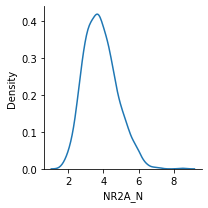

<Figure size 432x288 with 0 Axes>

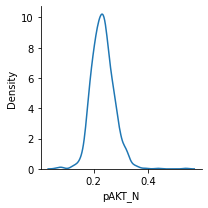

<Figure size 432x288 with 0 Axes>

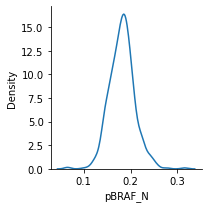

<Figure size 432x288 with 0 Axes>

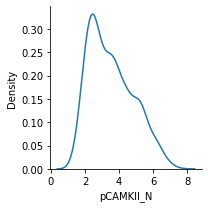

<Figure size 432x288 with 0 Axes>

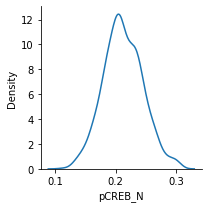

<Figure size 432x288 with 0 Axes>

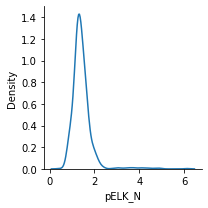

<Figure size 432x288 with 0 Axes>

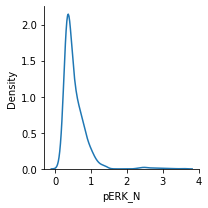

<Figure size 432x288 with 0 Axes>

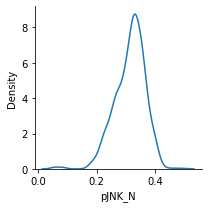

<Figure size 432x288 with 0 Axes>

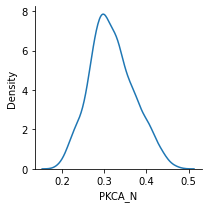

<Figure size 432x288 with 0 Axes>

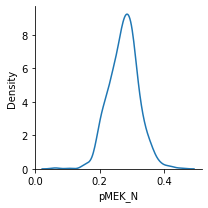

<Figure size 432x288 with 0 Axes>

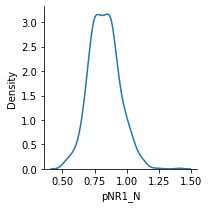

<Figure size 432x288 with 0 Axes>

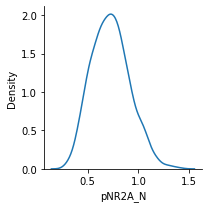

<Figure size 432x288 with 0 Axes>

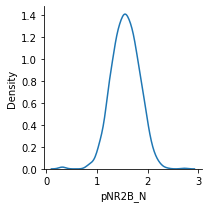

<Figure size 432x288 with 0 Axes>

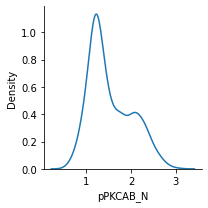

<Figure size 432x288 with 0 Axes>

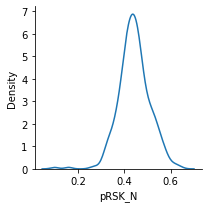

<Figure size 432x288 with 0 Axes>

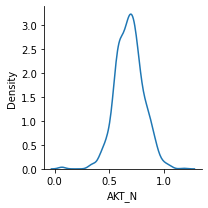

<Figure size 432x288 with 0 Axes>

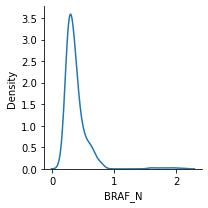

<Figure size 432x288 with 0 Axes>

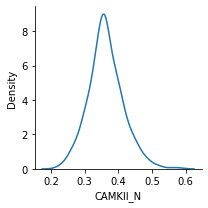

<Figure size 432x288 with 0 Axes>

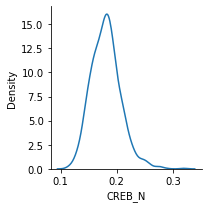

<Figure size 432x288 with 0 Axes>

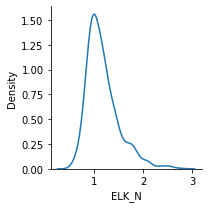

<Figure size 432x288 with 0 Axes>

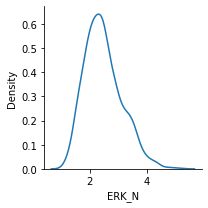

<Figure size 432x288 with 0 Axes>

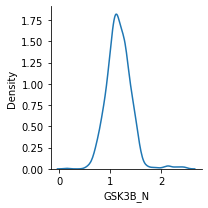

<Figure size 432x288 with 0 Axes>

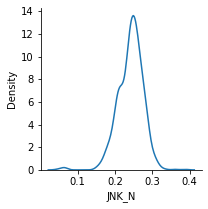

<Figure size 432x288 with 0 Axes>

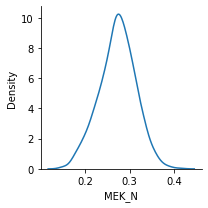

<Figure size 432x288 with 0 Axes>

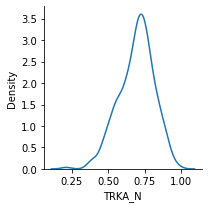

<Figure size 432x288 with 0 Axes>

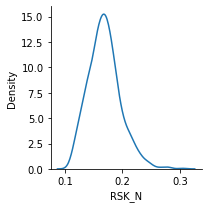

<Figure size 432x288 with 0 Axes>

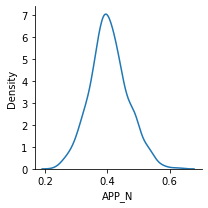

<Figure size 432x288 with 0 Axes>

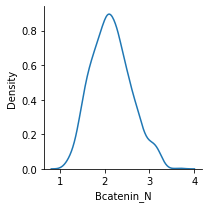

<Figure size 432x288 with 0 Axes>

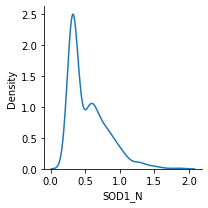

<Figure size 432x288 with 0 Axes>

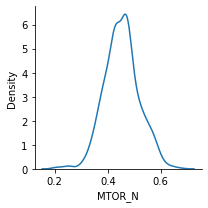

<Figure size 432x288 with 0 Axes>

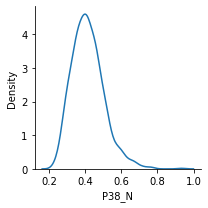

<Figure size 432x288 with 0 Axes>

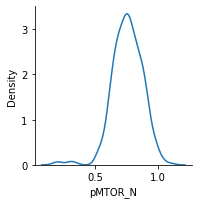

<Figure size 432x288 with 0 Axes>

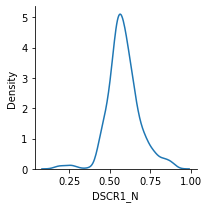

<Figure size 432x288 with 0 Axes>

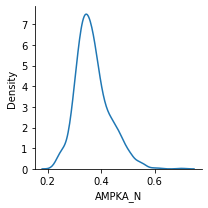

<Figure size 432x288 with 0 Axes>

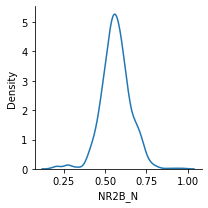

<Figure size 432x288 with 0 Axes>

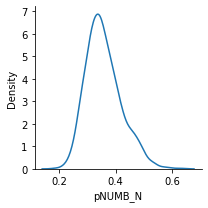

<Figure size 432x288 with 0 Axes>

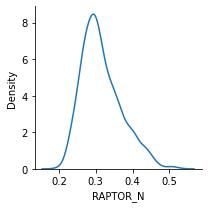

<Figure size 432x288 with 0 Axes>

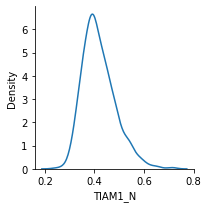

<Figure size 432x288 with 0 Axes>

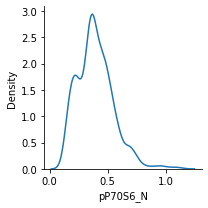

<Figure size 432x288 with 0 Axes>

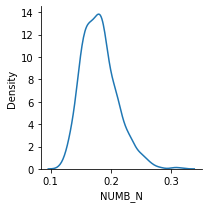

<Figure size 432x288 with 0 Axes>

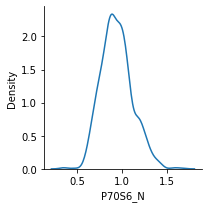

<Figure size 432x288 with 0 Axes>

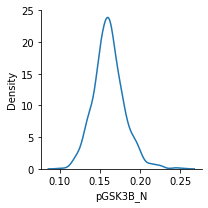

<Figure size 432x288 with 0 Axes>

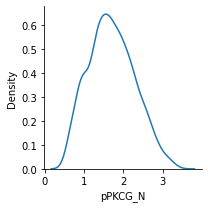

<Figure size 432x288 with 0 Axes>

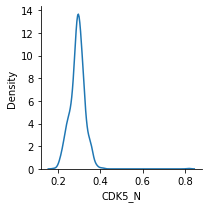

<Figure size 432x288 with 0 Axes>

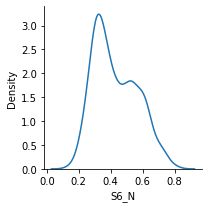

<Figure size 432x288 with 0 Axes>

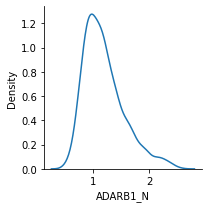

<Figure size 432x288 with 0 Axes>

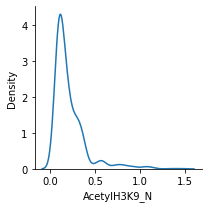

<Figure size 432x288 with 0 Axes>

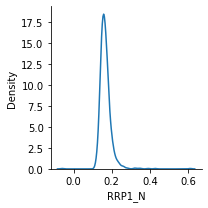

<Figure size 432x288 with 0 Axes>

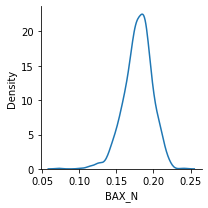

<Figure size 432x288 with 0 Axes>

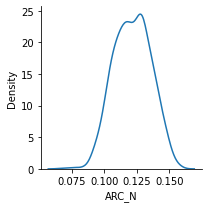

<Figure size 432x288 with 0 Axes>

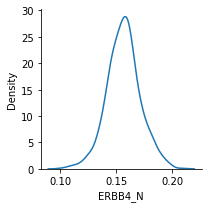

<Figure size 432x288 with 0 Axes>

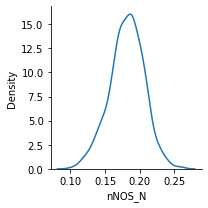

<Figure size 432x288 with 0 Axes>

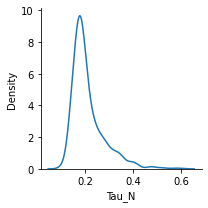

<Figure size 432x288 with 0 Axes>

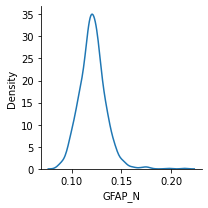

<Figure size 432x288 with 0 Axes>

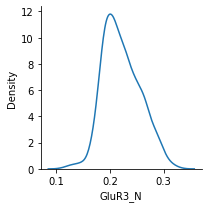

<Figure size 432x288 with 0 Axes>

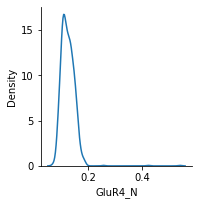

<Figure size 432x288 with 0 Axes>

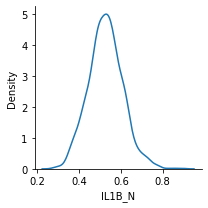

<Figure size 432x288 with 0 Axes>

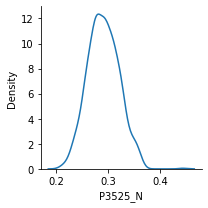

<Figure size 432x288 with 0 Axes>

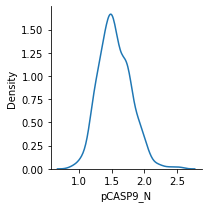

<Figure size 432x288 with 0 Axes>

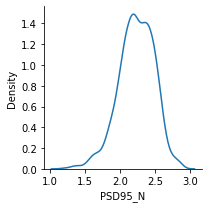

<Figure size 432x288 with 0 Axes>

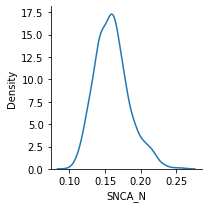

<Figure size 432x288 with 0 Axes>

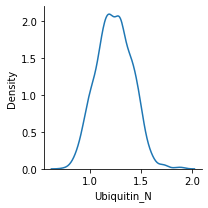

<Figure size 432x288 with 0 Axes>

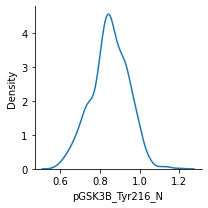

<Figure size 432x288 with 0 Axes>

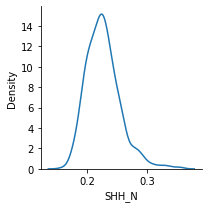

<Figure size 432x288 with 0 Axes>

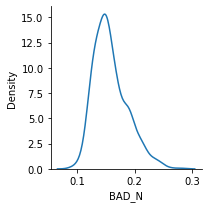

<Figure size 432x288 with 0 Axes>

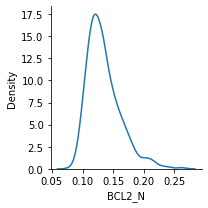

<Figure size 432x288 with 0 Axes>

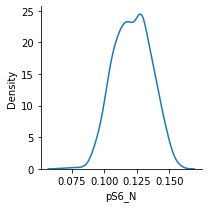

<Figure size 432x288 with 0 Axes>

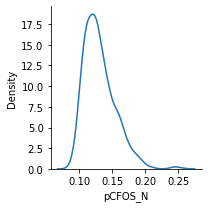

<Figure size 432x288 with 0 Axes>

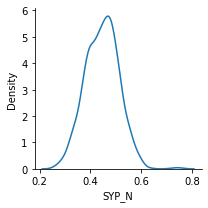

<Figure size 432x288 with 0 Axes>

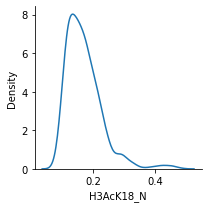

<Figure size 432x288 with 0 Axes>

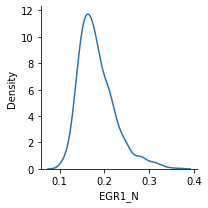

<Figure size 432x288 with 0 Axes>

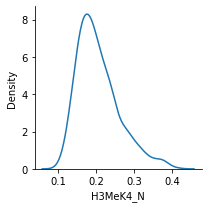

<Figure size 432x288 with 0 Axes>

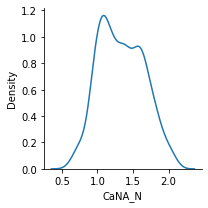

In [9]:
for col in df.select_dtypes(include=['float64','int64']):
    plt.figure()
    sns.displot(df[col],kind='kde',height=3)
    plt.show()

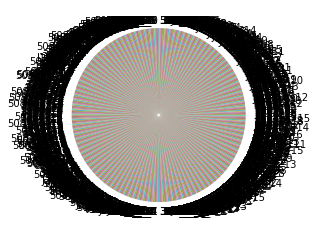

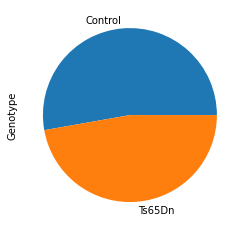

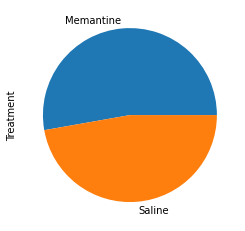

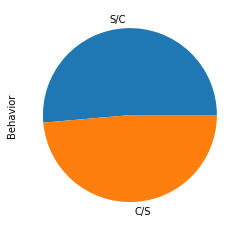

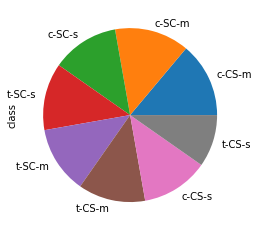

In [10]:
for col in df.select_dtypes("object"):
    plt.figure()
    df[col].value_counts().plot.pie()
    plt.show()

# A bit of data engineering ...

In [11]:
for col in df.select_dtypes("object"):
    print(f'{col :-<50} {df[col].unique()}')

MouseID------------------------------------------- ['309_1' '309_2' '309_3' ... 'J3295_13' 'J3295_14' 'J3295_15']
Genotype------------------------------------------ ['Control' 'Ts65Dn']
Treatment----------------------------------------- ['Memantine' 'Saline']
Behavior------------------------------------------ ['C/S' 'S/C']
class--------------------------------------------- ['c-CS-m' 'c-SC-m' 'c-CS-s' 'c-SC-s' 't-CS-m' 't-SC-m' 't-CS-s' 't-SC-s']


In [12]:
def encoding(df):
    code = {'Control':1,
            'Ts65Dn':0,
            'Memantine':1,
            'Saline':0,
            'C/S':0,
            'S/C':1,
            'c-CS-m':0,
            'c-SC-m':1,
            'c-CS-s':2,
            'c-SC-s':3,
            't-CS-m':4,
            't-SC-m':5,
            't-CS-s':6,
            't-SC-s':7,
           }
    for col in df.select_dtypes('object'):
        df.loc[:,col]=df[col].map(code)
        
    return df

def imputation(df):
    
    #df = df.dropna(axis=0)
    df = df.fillna(df.mean())
    
    return df

def feature_engineering(df):
    useless_columns = ['MouseID']
    for feature in useless_columns:
        if feature in df:
            df = df.drop(feature,axis=1)
    return df

In [13]:
def preprocessing(df):
    df = encoding(df)
    df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop('class',axis=1)
    y = df['class'].astype(int)
      
    return df,X,y

In [14]:
df=data.copy()
df,X,y = preprocessing(df)
df.head()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   

   pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N  \
0   2.373744  0.232224  1.750936  0.687906  0.306382  0.402698  0.296927   
1   2.292150  0.226972  1.596377  0.695006  0.299051  0.385987  0.281319   
2   2.283337  0.230247  1.561316  0.677348  0.291276  0.381002  0.281710   
3   2.152301  0.207004  1.595086  0.583277  0.296729  0.377087  0.313832   
4   2.134014  0.192158  1.504230  0.550960  0.286961  0.363502  0.277964   

     pNR1_N   pNR2A_N   pNR2B_N  pPKCAB_N    pRSK_N     AKT_N    BRAF_N  \
0  1.022060  0.605673  1.877684  2.308745  0.441599  0.859366  0.416289   
1  0.956676  0.587559  1.725774  2.043037  0.445222  0.834659  0.400364   
2  1.003635  0.602449  1.731873  2.017984  0.467668  0.814329  0.399847   
3  0.875390  0.520293  1.566852  2.132754  0.477671  0.727705  0.385639   
4  0.864912  0.507990  1.480059  2.013697  0.483416  0.687794  0.367531   

   CAMKII_N    CREB_N     ELK_N     ERK_N   GSK3B_N     JNK_N     MEK_N  \
0  0.369608  0.178944  1.866358  3.685247  1.537227  0.264526  0.319677   
1  0.356178  0.173680  1.761047  3.485287  1.509249  0.255727  0.304419   
2  0.368089  0.173905  1.765544  3.571456  1.501244  0.259614  0.311747   
3  0.362970  0.179449  1.286277  2.970137  1.419710  0.259536  0.279218   
4  0.355311  0.174836  1.324695  2.896334  1.359876  0.250705  0.273667   

     TRKA_N     RSK_N     APP_N  Bcatenin_N    SOD1_N    MTOR_N     P38_N  \
0  0.813866  0.165846  0.453910    3.037621  0.369510  0.458539  0.335336   
1  0.780504  0.157194  0.430940    2.921882  0.342279  0.423560  0.324835   
2  0.785154  0.160895  0.423187    2.944136  0.343696  0.425005  0.324852   
3  0.734492  0.162210  0.410615    2.500204  0.344509  0.429211  0.330121   
4  0.702699  0.154827  0.398550    2.456560  0.329126  0.408755  0.313415   

    pMTOR_N   DSCR1_N   AMPKA_N    NR2B_N   pNUMB_N  RAPTOR_N   TIAM1_N  \
0  0.825192  0.576916  0.448099  0.586271  0.394721  0.339571  0.482864   
1  0.761718  0.545097  0.420876  0.545097  0.368255  0.321959  0.454519   
2  0.757031  0.543620  0.404630  0.552994  0.363880  0.313086  0.447197   
3  0.746980  0.546763  0.386860  0.547849  0.366771  0.328492  0.442650   
4  0.691956  0.536860  0.360816  0.512824  0.351551  0.312206  0.419095   

   pP70S6_N    NUMB_N   P70S6_N  pGSK3B_N   pPKCG_N    CDK5_N      S6_N  \
0  0.294170  0.182150  0.842725  0.192608  1.443091  0.294700  0.354605   
1  0.276431  0.182086  0.847615  0.194815  1.439460  0.294060  0.354548   
2  0.256648  0.184388  0.856166  0.200737  1.524364  0.301881  0.386087   
3  0.398534  0.161768  0.760234  0.184169  1.612382  0.296382  0.290680   
4  0.393447  0.160200  0.768113  0.185718  1.645807  0.296829  0.309345   

   ADARB1_N  AcetylH3K9_N    RRP1_N     BAX_N     ARC_N   ERBB4_N    nNOS_N  \
0  1.339070      0.170119  0.159102  0.188852  0.106305  0.144989  0.176668   
1  1.306323      0.171427  0.158129  0.184570  0.106592  0.150471  0.178309   
2  1.279600      0.185456  0.148696  0.190532  0.108303  0.145330  0.176213   
3  1.198765      0.159799  0.166112  0.185323  0.103184  0.140656  0.163804   
4  1.206995      0.164650  0.160687  0.188221  0.104784  0.141983  0.167710   

      Tau_N    GFAP_N   GluR3_N   GluR4_N    IL1B_N   P3525_N  pCASP9_N  \
0  0.125190  0.115291  0.228043  0.142756  0.430957  0.247538  1.603310   
1  0.134275  0.118235  0.238073  0.142037  0.457156  0.257632  1.671738   
2  0.132560  0.117760  0.244817  0.142445  0.510472  0.255343  1.663550   
3  0.123210  0.117439  0.234947  0.145068  0.430996  

In [15]:
c_CS_m = df[y == 0]
c_SC_m = df[y == 1]
c_CS_s = df[y == 2]
c_SC_s = df[y == 3]
t_cs_m = df[y == 4]
t_SC_m = df[y == 5]
t_CS_s = df[y == 6]
t_SC_s = df[y == 7]

# Detailed analysis

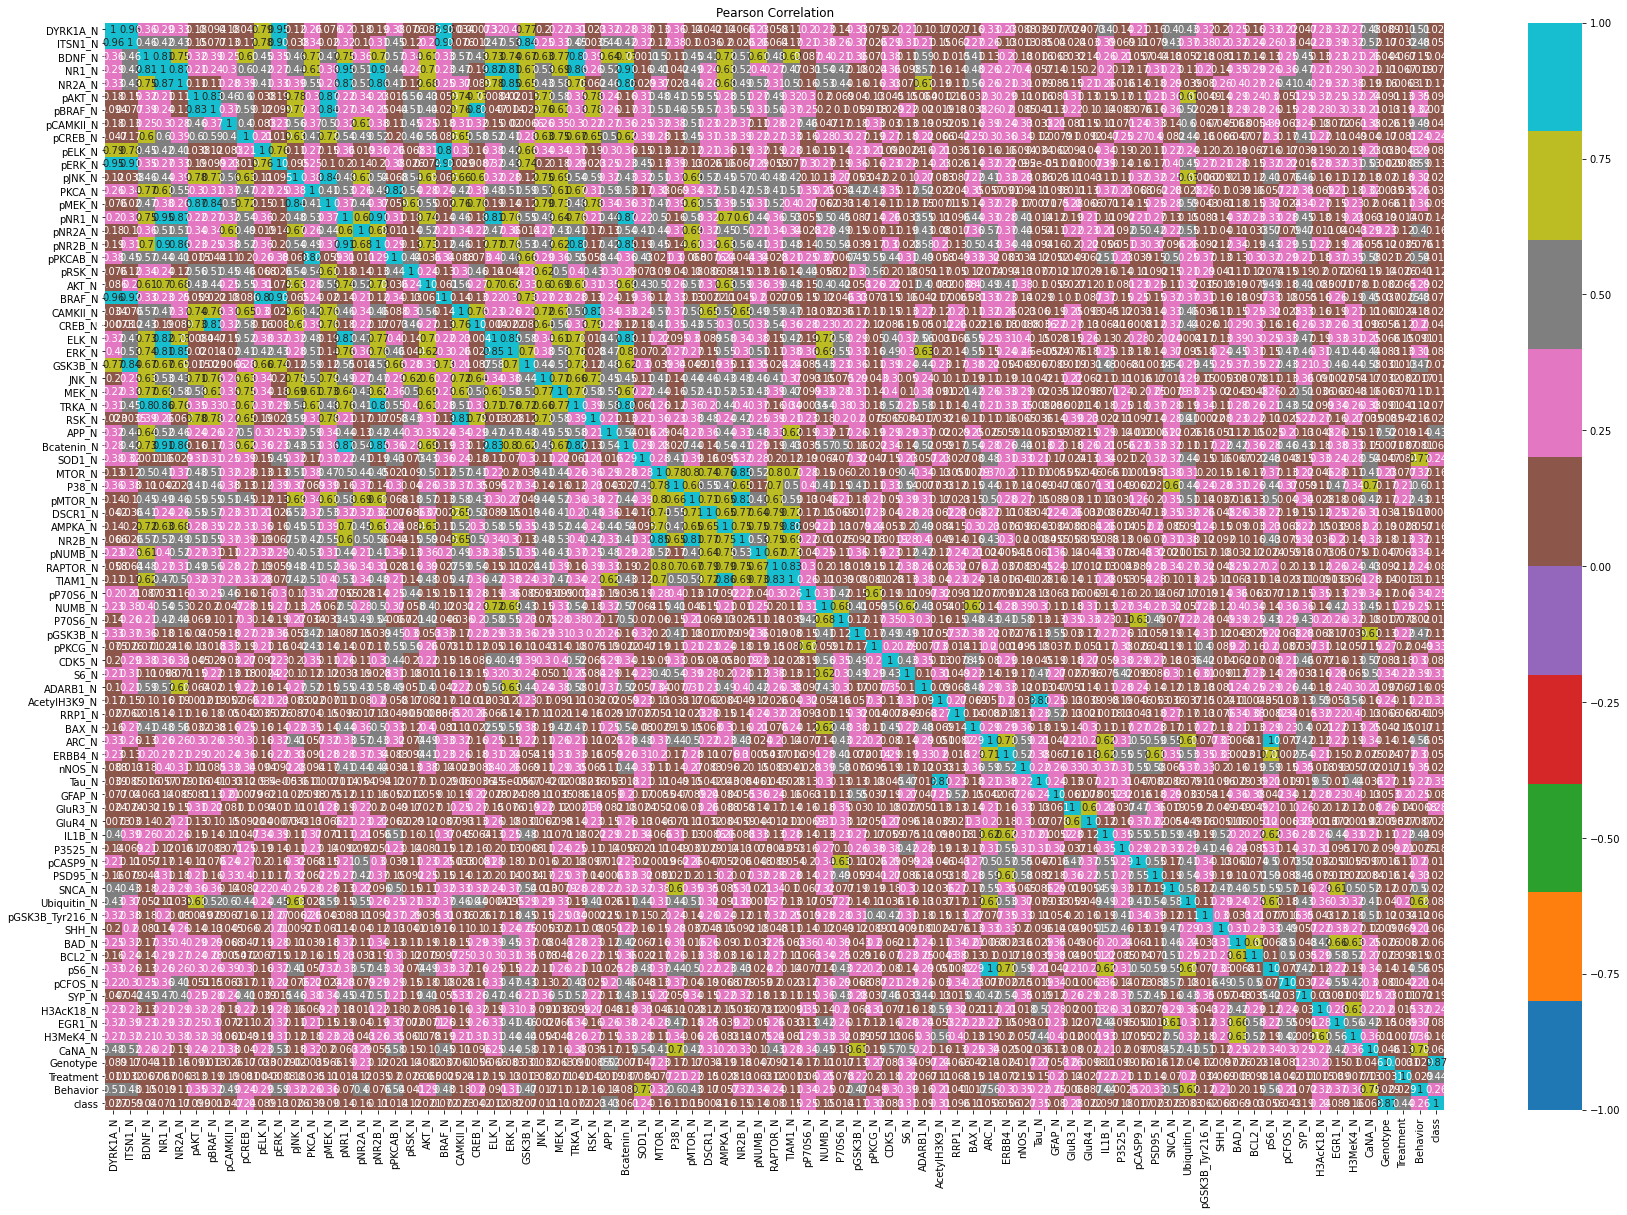

In [16]:
corr = df.corr(method='pearson').abs()

fig = plt.figure(figsize=(30,20))
sns.heatmap(corr, annot=True, cmap='tab10', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')
plt.show()

In [17]:
df.corr()['class'].abs().sort_values()

DSCR1_N            0.000405
pBRAF_N            0.001241
JNK_N              0.011161
ELK_N              0.011574
pPKCAB_N           0.014082
P70S6_N            0.014352
pCASP9_N           0.017277
AKT_N              0.021164
GluR4_N            0.022090
SNCA_N             0.022768
RSK_N              0.023023
PSD95_N            0.023064
CAMKII_N           0.023299
pJNK_N             0.026123
nNOS_N             0.026994
DYRK1A_N           0.027169
BCL2_N             0.030229
PKCA_N             0.038828
BDNF_N             0.040251
CREB_N             0.041921
pCFOS_N            0.043059
pCAMKII_N          0.047267
ERBB4_N            0.055579
ARC_N              0.055598
pS6_N              0.055598
ITSN1_N            0.059088
Bcatenin_N         0.061481
pGSK3B_Tyr216_N    0.061832
SHH_N              0.067863
CaNA_N             0.068317
BAD_N              0.068883
GSK3B_N            0.070202
NR1_N              0.071079
TRKA_N             0.071720
BRAF_N             0.072357
RAPTOR_N           0

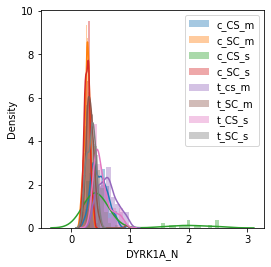

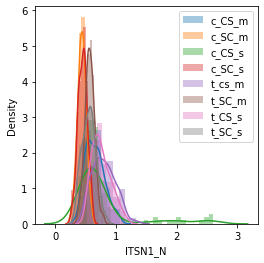

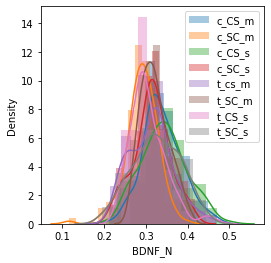

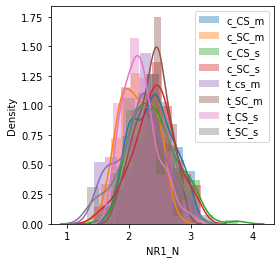

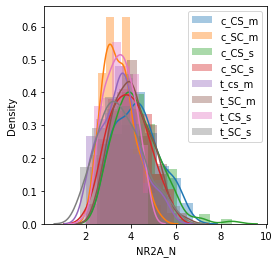

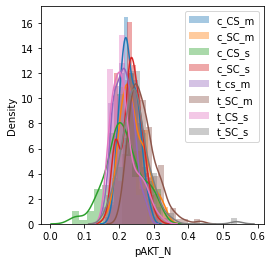

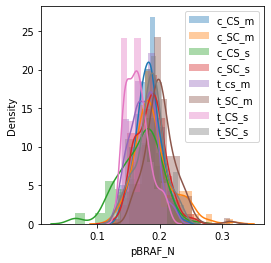

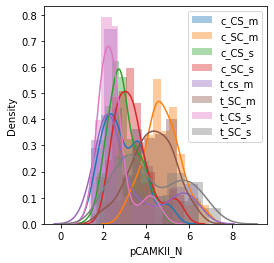

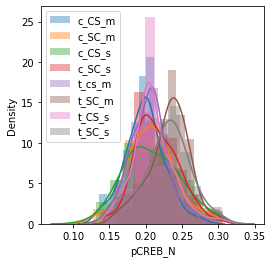

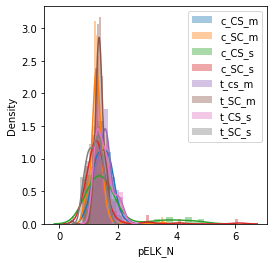

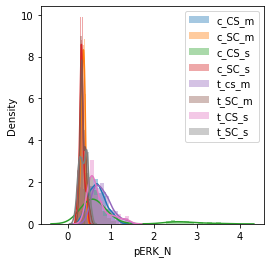

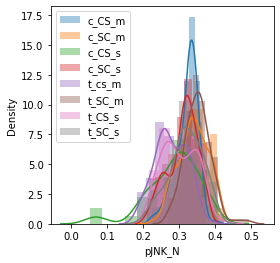

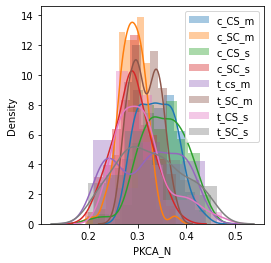

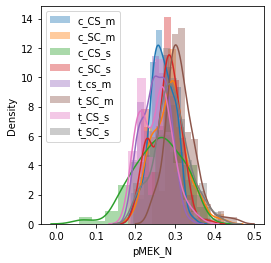

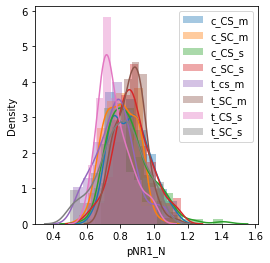

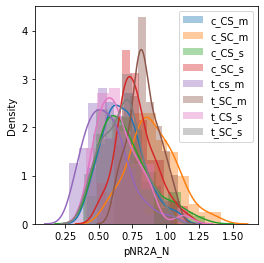

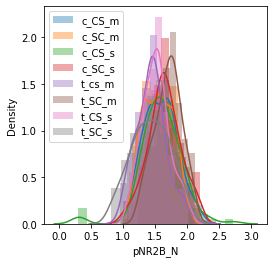

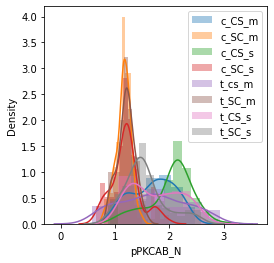

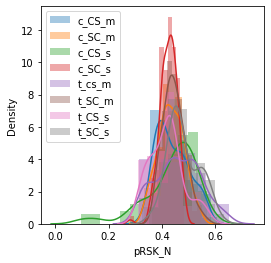

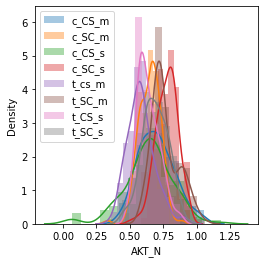

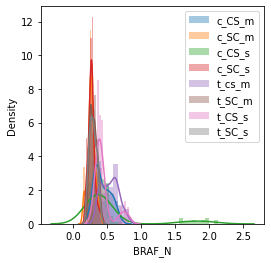

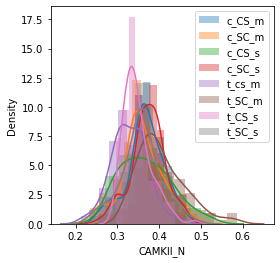

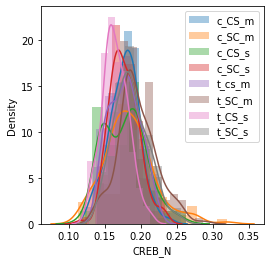

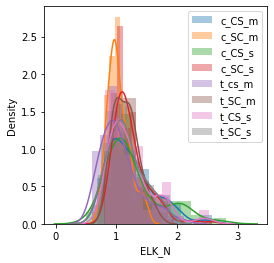

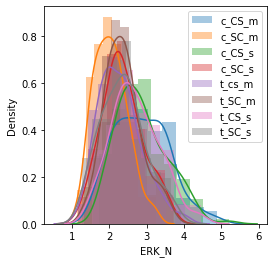

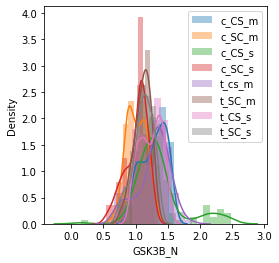

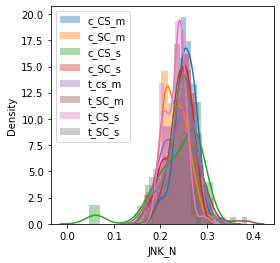

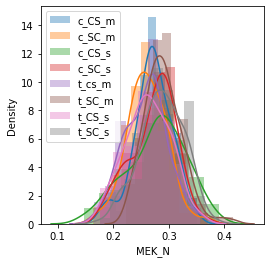

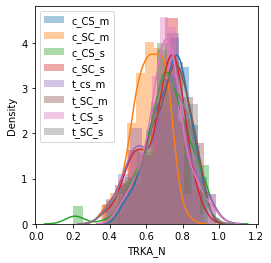

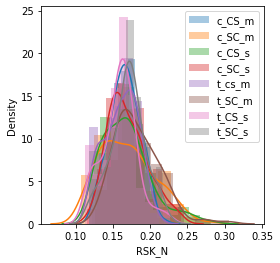

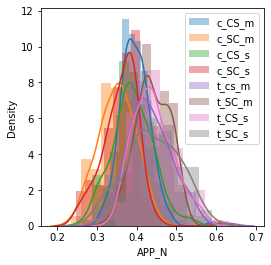

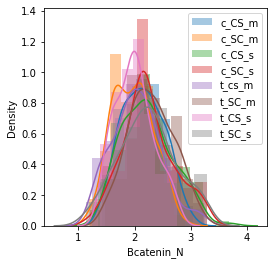

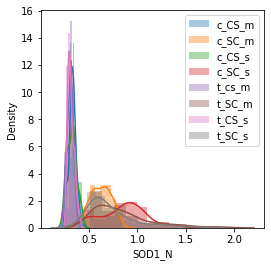

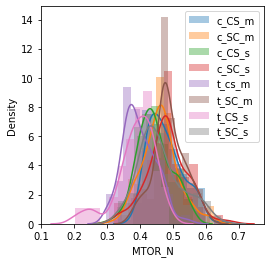

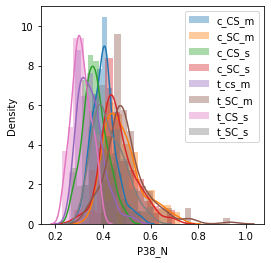

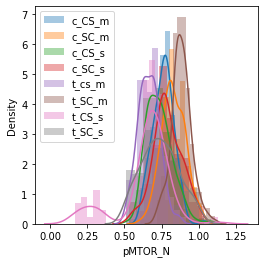

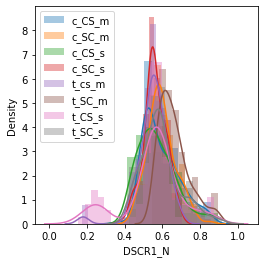

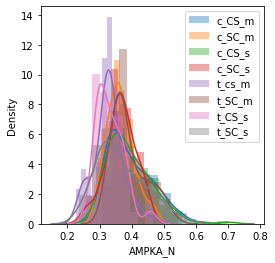

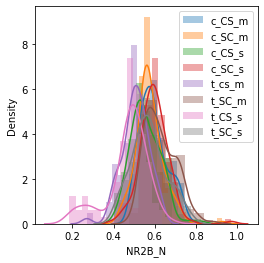

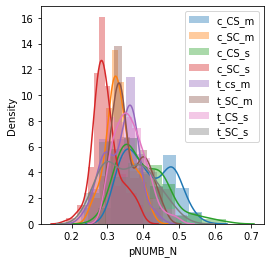

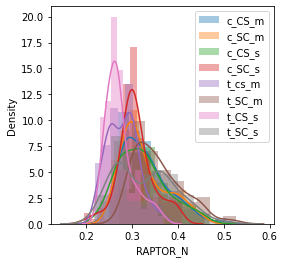

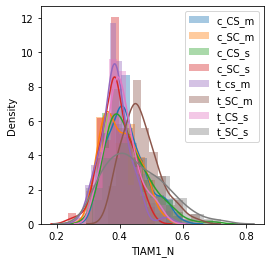

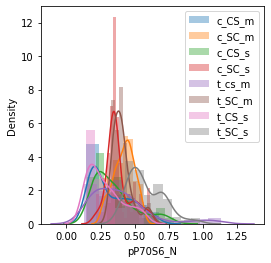

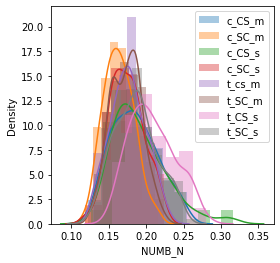

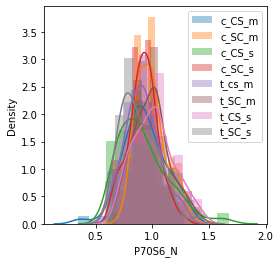

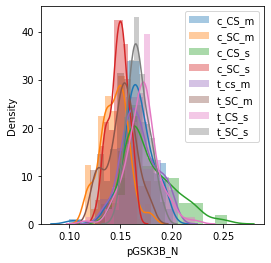

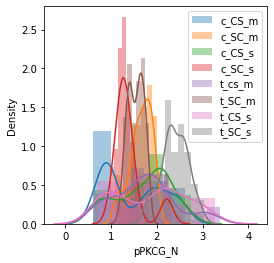

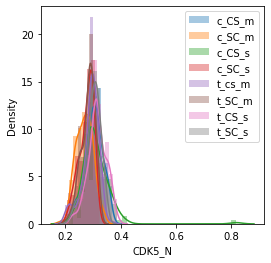

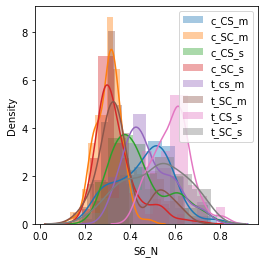

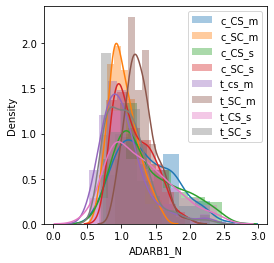

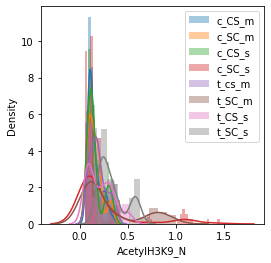

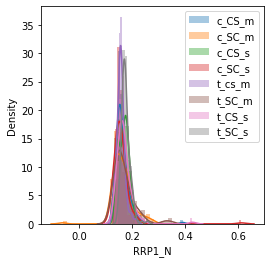

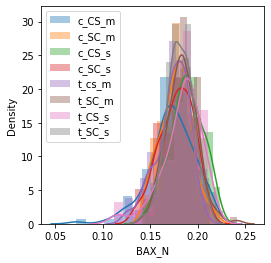

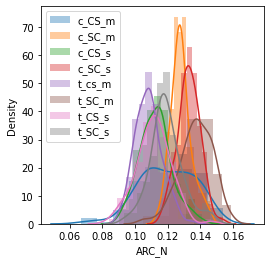

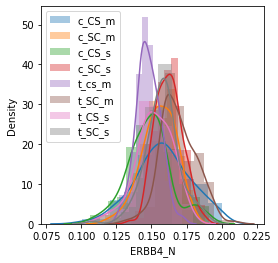

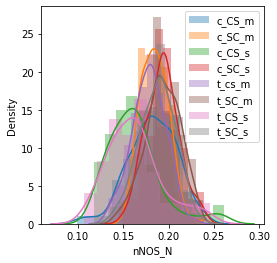

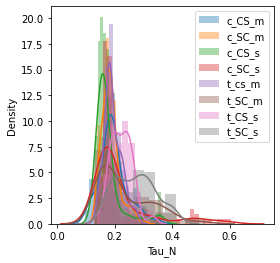

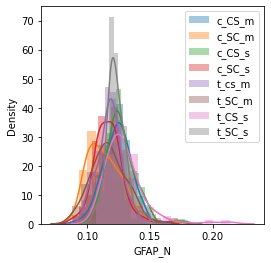

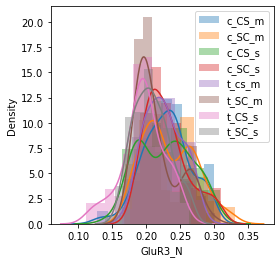

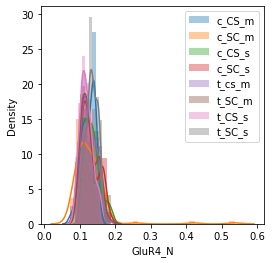

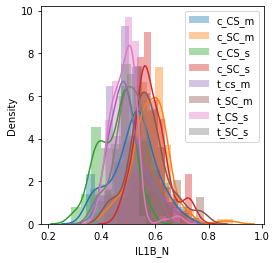

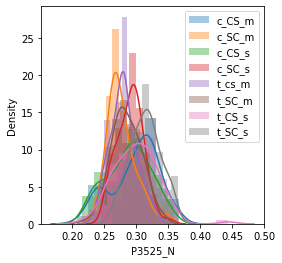

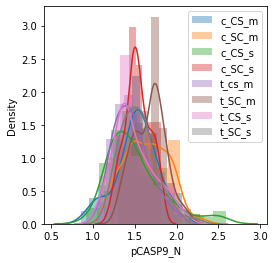

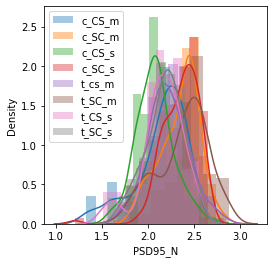

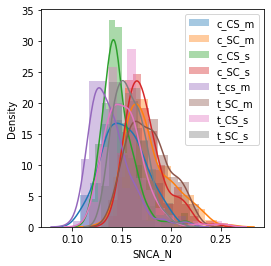

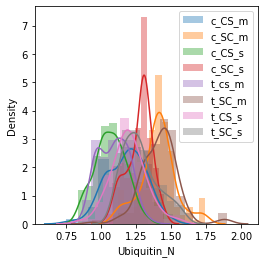

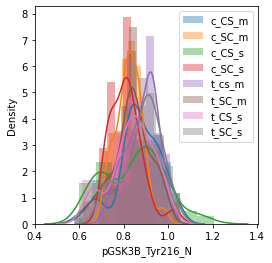

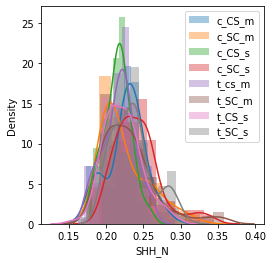

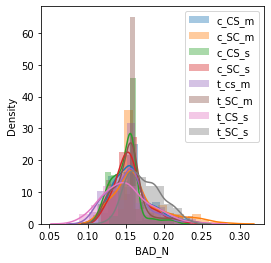

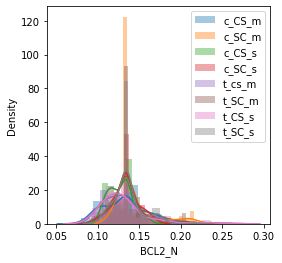

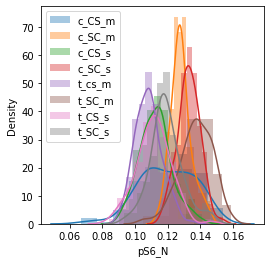

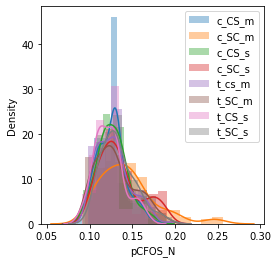

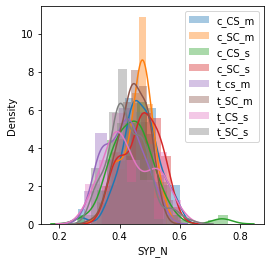

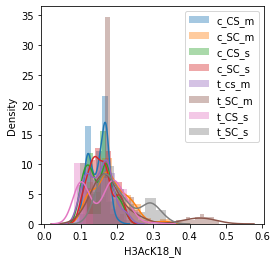

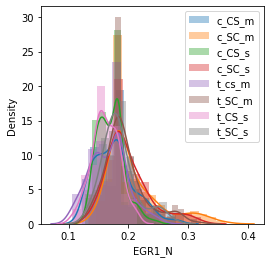

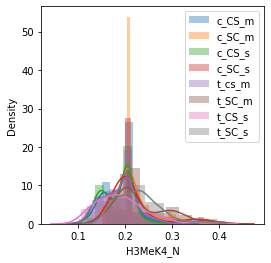

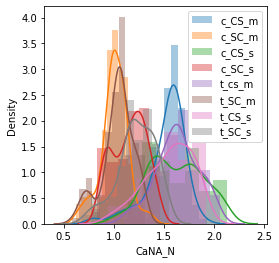

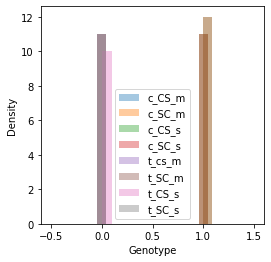

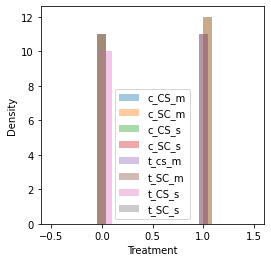

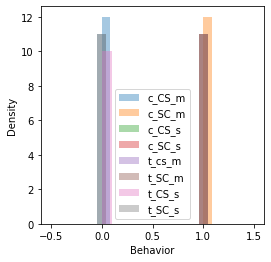

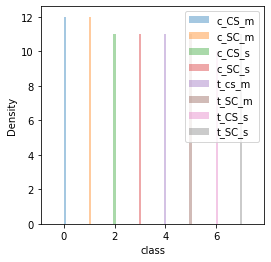

In [18]:
for col in df.columns:
    plt.figure(figsize=(4,4))
    sns.distplot(c_CS_m[col],label='c_CS_m')
    sns.distplot(c_SC_m[col],label='c_SC_m')
    sns.distplot(c_CS_s[col],label='c_CS_s')
    sns.distplot(c_SC_s[col],label='c_SC_s')
    sns.distplot(t_cs_m[col],label='t_cs_m')
    sns.distplot(t_SC_m[col],label='t_SC_m')
    sns.distplot(t_CS_s[col],label='t_CS_s')
    sns.distplot(t_SC_s[col],label='t_SC_s')
    plt.legend()
    plt.show()

# Modelling

In [19]:
from sklearn.model_selection import train_test_split
df = data.copy()
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)
print(trainset['class'].value_counts())
print(testset['class'].value_counts())

c-CS-m    126
c-SC-m    125
t-SC-m    111
t-SC-s    109
c-CS-s    108
c-SC-s    104
t-CS-m    103
t-CS-s     78
Name: class, dtype: int64
t-CS-m    32
c-SC-s    31
t-CS-s    27
c-CS-s    27
t-SC-s    26
c-SC-m    25
c-CS-m    24
t-SC-m    24
Name: class, dtype: int64


In [20]:
_, X_train, y_train = preprocessing(trainset)
_, X_test, y_test = preprocessing(testset)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [22]:
preprocessor = make_pipeline(StandardScaler())

PCAPipeline = make_pipeline(preprocessor, PCA(n_components=2,random_state=0))

RandomPipeline = make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
AdaPipeline = make_pipeline(preprocessor,AdaBoostClassifier(random_state=0))
SVMPipeline = make_pipeline(preprocessor,SVC(random_state=0,probability=True))
KNNPipeline = make_pipeline(preprocessor,KNeighborsClassifier())
LRPipeline = make_pipeline(preprocessor,LogisticRegression(solver='sag'))

## PCA Analysis

In [23]:
PCA_df = pd.DataFrame(PCAPipeline.fit_transform(X))
PCA_df = pd.concat([PCA_df, data['class']], axis=1)
PCA_df.head()

0         1   class
0  4.643039  5.456956  c-CS-m
1  3.028412  5.515211  c-CS-m
2  3.144482  5.717241  c-CS-m
3  0.643212  4.072579  c-CS-m
4 -0.406231  4.367141  c-CS-m

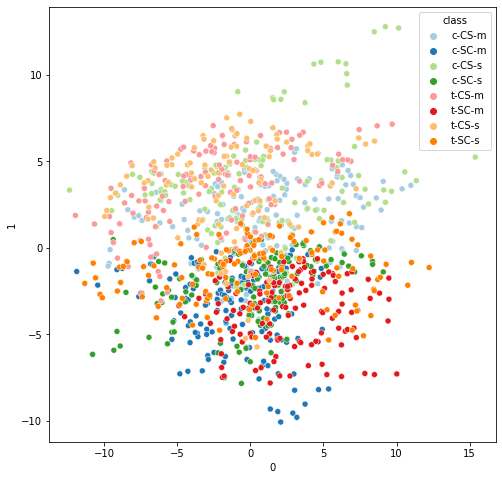

In [24]:
plt.figure(figsize=(8,8))
sns.scatterplot(PCA_df[0],PCA_df[1],hue=PCA_df['class'],palette=sns.color_palette("Paired", 8))
plt.show()

## Classification problem

In [25]:
dict_of_models = {'RandomForest': RandomPipeline,
'AdaBoost': AdaPipeline,
'SVM': SVMPipeline,
'KNN': KNNPipeline,
'LR': LRPipeline}

In [26]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import learning_curve, cross_val_score, GridSearchCV

def evaluation(model):
    model.fit(X_train, y_train)
    # calculating the probabilities
    y_pred_proba = model.predict_proba(X_test)

    # finding the predicted valued
    y_pred = np.argmax(y_pred_proba,axis=1)
    print('Accuracy = ', accuracy_score(y_test, y_pred))
    print('-')
    print(confusion_matrix(y_test,y_pred))
    print('-')
    print(classification_report(y_test,y_pred))
    print('-')
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, scoring='accuracy', train_sizes=np.linspace(0.1,1,10))
    
    plt.figure(figsize=(8,6))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

---------------------------------
RandomForest
Accuracy =  1.0
-
[[24  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0]
 [ 0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0 24  0  0]
 [ 0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 26]]
-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        32
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        26

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216

-
---------------------------------
AdaBoost
Accuracy =  1.0
-
[[

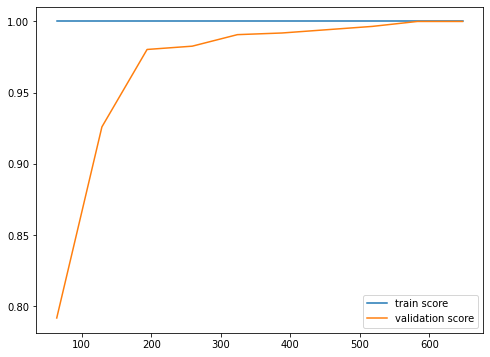

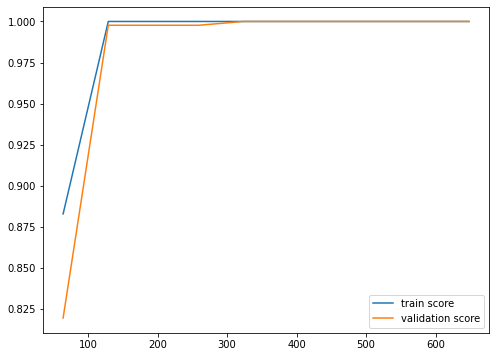

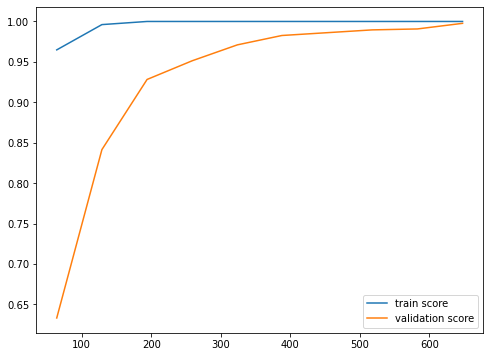

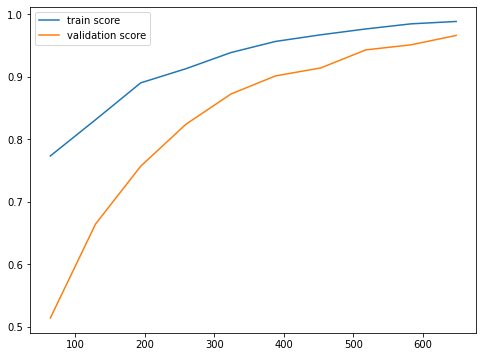

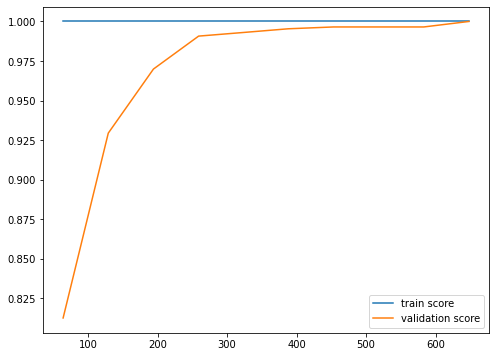

In [27]:
for name, model in dict_of_models.items():
    print('---------------------------------')
    print(name)
    evaluation(model)

# Mid-conclusion : 100% Accuracy on most models

For the 5 models tested hereabove, here are the accuracies :
- KNN : 98%
- SVM / RandomForest / Adaboost / LogisticRegression : 100%


# Idea 1 : Separate the data in 2 groups : Control mice "C-" and Trisomy mice "T-"

#### The idea here is to identify what was injected to the mouse and wether it is stimulated to learn or not
**(H0 : The mouse is not trisomic)**


In [28]:
Control_df = data.loc[data['class'].str.startswith('c', na=False)]
Trisomy_df = data.loc[data['class'].str.startswith('t', na=False)]
print(Trisomy_df['class'].unique())

['t-CS-m' 't-SC-m' 't-CS-s' 't-SC-s']


## Control mice "C-"

In [29]:
Control_df,X,y = preprocessing(Control_df)
trainset, testset = train_test_split(Control_df, test_size=0.2, random_state=0)
print(trainset['class'].value_counts())
print(testset['class'].value_counts())

0    122
1    122
3    110
2    102
Name: class, dtype: int64
2    33
0    28
1    28
3    25
Name: class, dtype: int64


In [30]:
_, X_train, y_train = preprocessing(trainset)
_, X_test, y_test = preprocessing(testset)

### PCA Analysis

In [31]:
PCA_df = pd.DataFrame(PCAPipeline.fit_transform(X))
PCA_df.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
PCA_df = pd.concat([PCA_df, y], axis=1)
PCA_df.head()

0         1  class
0  6.208842 -4.046564      0
1  4.736616 -4.661880      0
2  4.915870 -4.728123      0
3  2.018200 -4.454860      0
4  1.128297 -5.048759      0

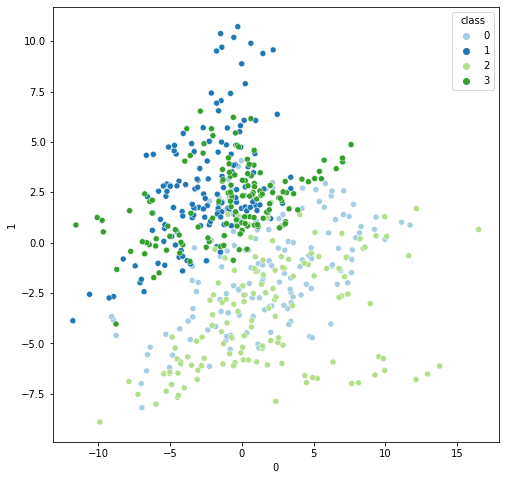

In [32]:
plt.figure(figsize=(8,8))
sns.scatterplot(PCA_df[0],PCA_df[1],hue=PCA_df['class'],palette=sns.color_palette("Paired", 4))
plt.show()

## Models evalutation

---------------------------------
RandomForest
Accuracy =  1.0
-
[[28  0  0  0]
 [ 0 28  0  0]
 [ 0  0 33  0]
 [ 0  0  0 25]]
-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        25

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

-
---------------------------------
AdaBoost
Accuracy =  1.0
-
[[28  0  0  0]
 [ 0 28  0  0]
 [ 0  0 33  0]
 [ 0  0  0 25]]
-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        25

    accuracy                           

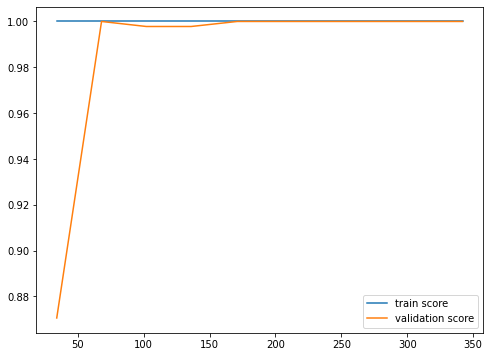

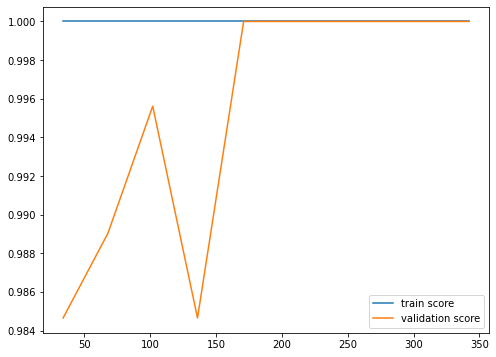

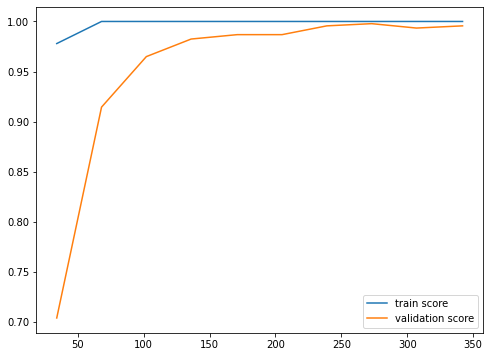

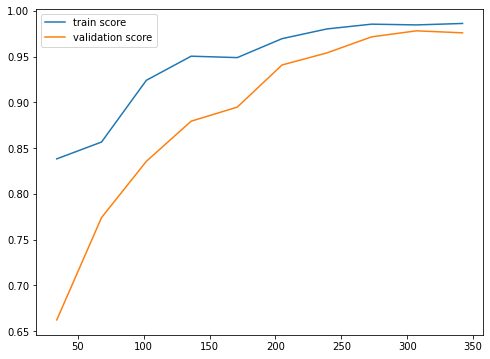

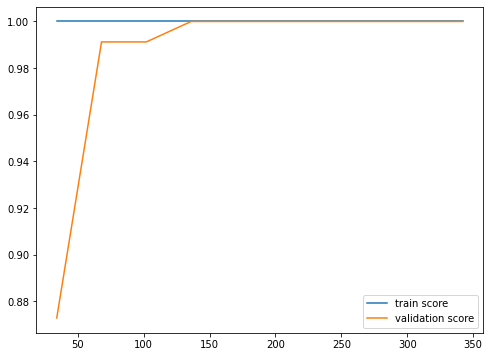

In [33]:
for name, model in dict_of_models.items():
    print('---------------------------------')
    print(name)
    evaluation(model)

## Trisomy mice "T-" (Work in progress)

In [34]:
Trisomy_df,X,y = preprocessing(Trisomy_df)
trainset, testset = train_test_split(Trisomy_df, test_size=0.2, random_state=0)
print(trainset['class'].value_counts())
print(testset['class'].value_counts())

5    110
4    109
7    108
6     81
Name: class, dtype: int64
7    27
4    26
5    25
6    24
Name: class, dtype: int64


In [35]:
_, X_train, y_train = preprocessing(trainset)
_, X_test, y_test = preprocessing(testset)

In [36]:
y_train.head()

892    6
942    6
641    4
965    7
576    4
Name: class, dtype: int64

### PCA Analysis

In [37]:
PCA_df = pd.DataFrame(PCAPipeline.fit_transform(X))
PCA_df.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
PCA_df = pd.concat([PCA_df, y], axis=1)
PCA_df.head()

0         1  class
0 -1.019302  7.414716      4
1  0.148803  8.098498      4
2  0.629234  8.159883      4
3 -3.759011  5.464395      4
4 -2.490917  6.301093      4

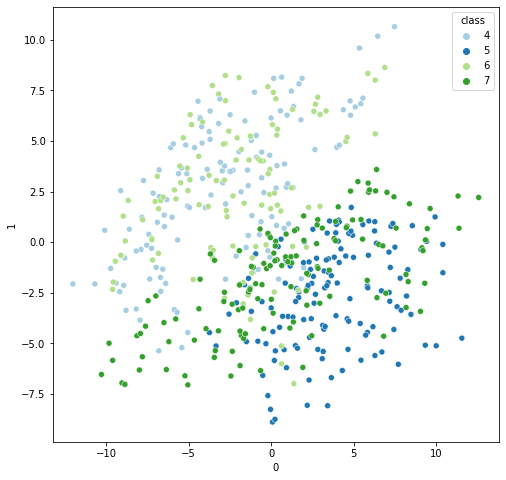

In [38]:
plt.figure(figsize=(8,8))
sns.scatterplot(PCA_df[0],PCA_df[1],hue=PCA_df['class'],palette=sns.color_palette("Paired", 4))
plt.show()

## Models evalutation

---------------------------------
RandomForest
Accuracy =  0.0
-
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [26  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0]
 [ 0  0  0 27  0  0  0  0]]
-
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00      26.0
           5       0.00      0.00      0.00      25.0
           6       0.00      0.00      0.00      24.0
           7       0.00      0.00      0.00      27.0

    accuracy                           0.00     102.0
   macro avg       0.00      0.00      0.00     102.0
weighted avg       0.00      0.00      0.00     102.0

-
---------------------------------
AdaBoost
Accuracy =  0.0
-
[[

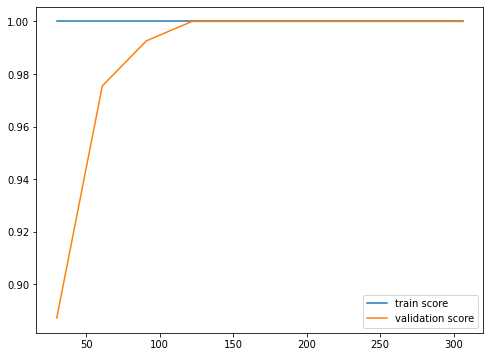

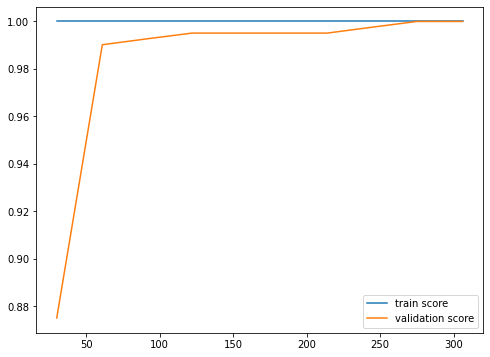

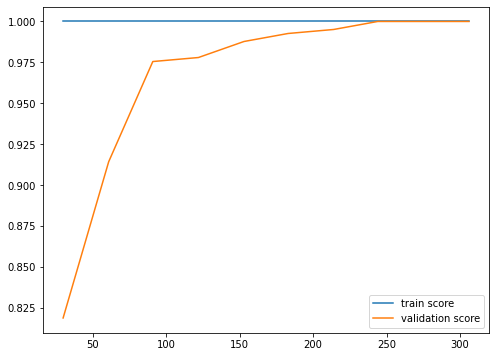

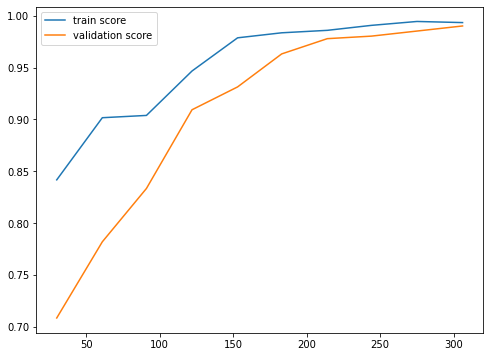

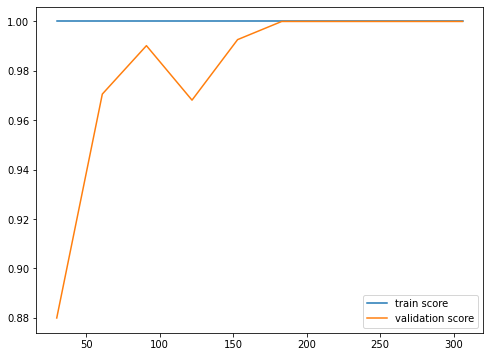

In [39]:
for name, model in dict_of_models.items():
    print('---------------------------------')
    print(name)
    evaluation(model)

# Idea 2 : Separate the data in 4 groups : "CS-M" "CS-S" "SC-M" "SC-S"

#### The idea here is to identify wheter the mouse is trisomic or not

**(H0 : The mouse has been injected with saline)**

**(H1 : The mouse is stimulated to learn)**

> Incoming

# If you like please upvote !
## Also check my other notebooks :
#### 🔎EDA & Modelling🔮 - 🐁Mice Trisomy (100% acc.) : https://www.kaggle.com/dorianvoydie/eda-modelling-mice-100-acc
#### 🔎EDA & Modelling🔮 - 🩺🎗️Breast Cancer Detection : https://www.kaggle.com/dorianvoydie/eda-modelling-breast-cancer-detection
#### 🌦🌡 Weather Forecasting 📈 (98% acc.) : https://www.kaggle.com/dorianvoydie/weather-forecasting-98-acc
#### 🔎EDA & Modelling🔮 - Heart Attack 🩺💓 (90% Acc.) : https://www.kaggle.com/dorianvoydie/eda-modelling-heart-attack-90-accuracy-score
#### 🔎EDA & Modelling🔮 - Mobile price (95.5% acc.) : https://www.kaggle.com/dorianvoydie/eda-modelling-95-5-acc-mobile-price
#### 🔎EDA & Modelling🔮 - 🩺🧠 Stroke (74% acc.) : https://www.kaggle.com/dorianvoydie/eda-modelling-stroke-74-acc